## Подключаемые библиотеки

In [34]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

## Параметры линии
### Погонные параметры линии
### Частота, длина волны

In [117]:
R1=0
G1=0
L1=10e-12
C1=10e-12
W=np.sqrt(L1/C1)

c=3*1e8
f=1e9
lmd=c/f

1.0

## Коэффициент отражения

In [79]:
w=2*np.pi*f
# alpha=0
# betta=w*np.sqrt(L1*C1)
# gamma=alpha+1j*betta

Y1=G1+1j*w*C1
Z1=R1+1j*w*L1
gamma=np.sqrt(Y1*Z1)
print(gamma)

0.06283185307179585j


## Расчёт распределения напряжения и тока

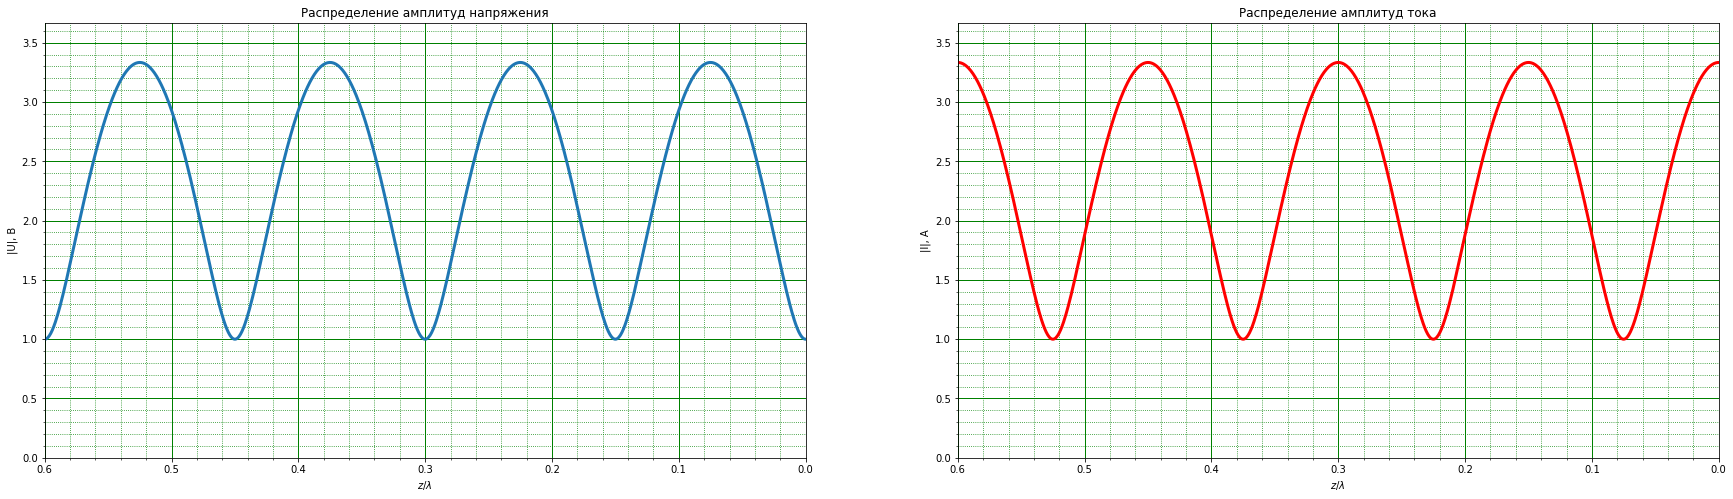

In [153]:
#Ток и напряжение на нагрузке
# In=1
Un = 1
# Zn=Un/In
Rn=0.3*W
Xn=0*W
Zn=Rn+1j*Xn

z=np.linspace(0,2,1000)*lmd

# Без потерь
def UI(z,Zn):
    U=Un*np.cos(2*np.pi/lmd*z)+(Un/Zn)*W*np.sin(2*np.pi/lmd*z)*1j
    I=(Un/Zn)*np.cos(2*np.pi/lmd*z)+Un/W*np.sin(2*np.pi/lmd*z)*1j
    return (U,I)

U1=UI(z,Zn)[0]
I1=UI(z,Zn)[1]

fig1, ax = plt.subplots(1,2,figsize=(30, 8))#, dpi=200)

ax[0].plot(z,np.abs(U1), linewidth=3)
ax[0].grid()
ax[0].set_xlim([2*lmd,0])
ax[0].set_ylim([0, 1.1*max(abs(U1))])
ax[1].set_ylim([0, 1.1*max(abs(I1))])
ax[0].set_xlabel('$z/\lambda$')
ax[0].set_ylabel('|U|, В')
ax[0].minorticks_on()
ax[0].grid(which='major', color = 'green', linewidth = 1)
ax[0].grid(which='minor', color = 'green', linestyle = ':')
ax[0].set_title("Распределение амплитуд напряжения")
ax[1].set_title("Распределение амплитуд тока")
ax[1].plot(z,np.abs(I1),'r', linewidth=3)
ax[1].grid()
ax[1].set_xlim([2*lmd,0])
ax[1].set_xlabel("$z/\lambda$")
ax[1].minorticks_on()
ax[1].grid(which='major', color = 'green', linewidth = 1)
ax[1].grid(which='minor', color = 'green', linestyle = ':')
ax[1].set_ylabel('|I|, А');

## Распределение входного сопротивления

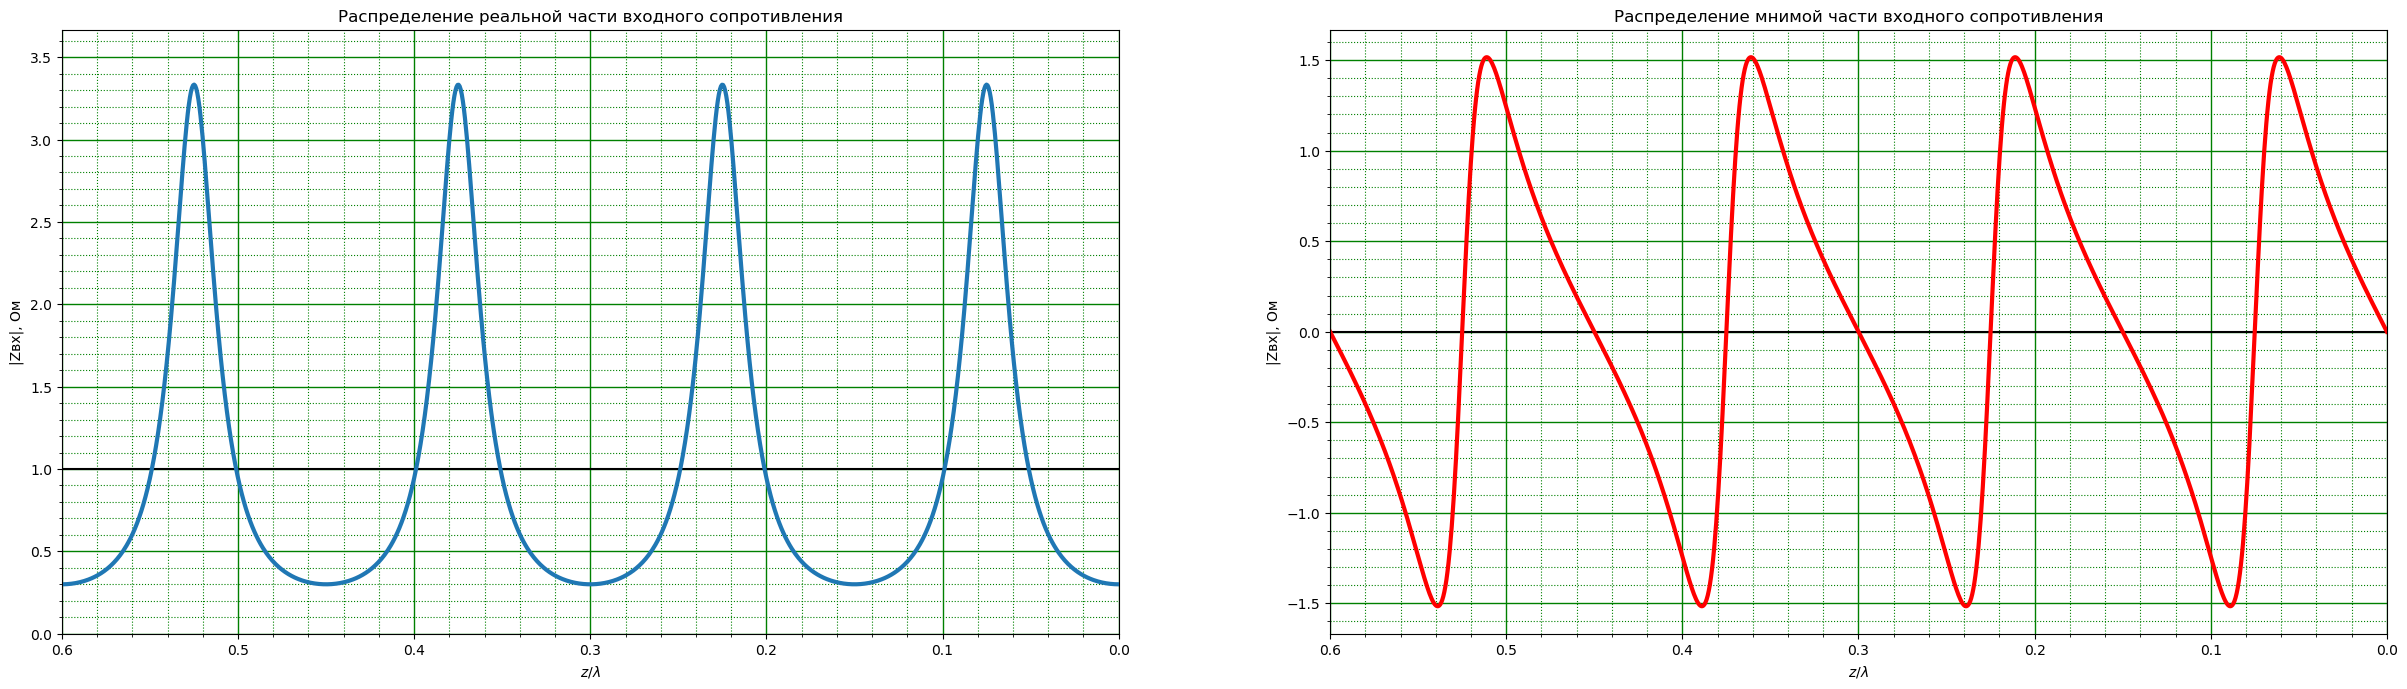

In [152]:
Zin=U1/I1

fig1, ax = plt.subplots(1,2,figsize=(30, 8), dpi=100)

ax[0].plot(z, np.real(Zin), linewidth=3)
ax[0].hlines(W, 2*lmd, 0)
ax[0].grid()
ax[0].set_xlim([2*lmd,0])
ax[0].set_ylim([0, 1.1*max(np.real(Zin))])
ax[0].set_xlabel('$z/\lambda$')
ax[0].set_ylabel('|Zвх|, Ом')
ax[0].set_title("Распределение реальной части входного сопротивления")
#Сетка
ax[0].minorticks_on()
ax[0].grid(which='major', color = 'green', linewidth = 1)
ax[0].grid(which='minor', color = 'green', linestyle = ':')

ax[1].plot(z,np.imag(Zin), 'r', linewidth=3)
ax[1].hlines(0, 2*lmd, 0)
ax[1].grid()
ax[1].set_xlim([2*lmd,0])
ax[1].set_ylim([1.1*min(np.imag(Zin)), 1.1*max(np.imag(Zin))])
ax[1].set_xlabel('$z/\lambda$')
ax[1].set_ylabel('|Zвх|, Ом')
ax[1].minorticks_on()
ax[1].grid(which='major', color = 'green', linewidth = 1)
ax[1].grid(which='minor', color = 'green', linestyle = ':')
ax[1].set_title("Распределение мнимой части входного сопротивления");

## Линия с потерями

Text(0, 0.5, '|I|, А')

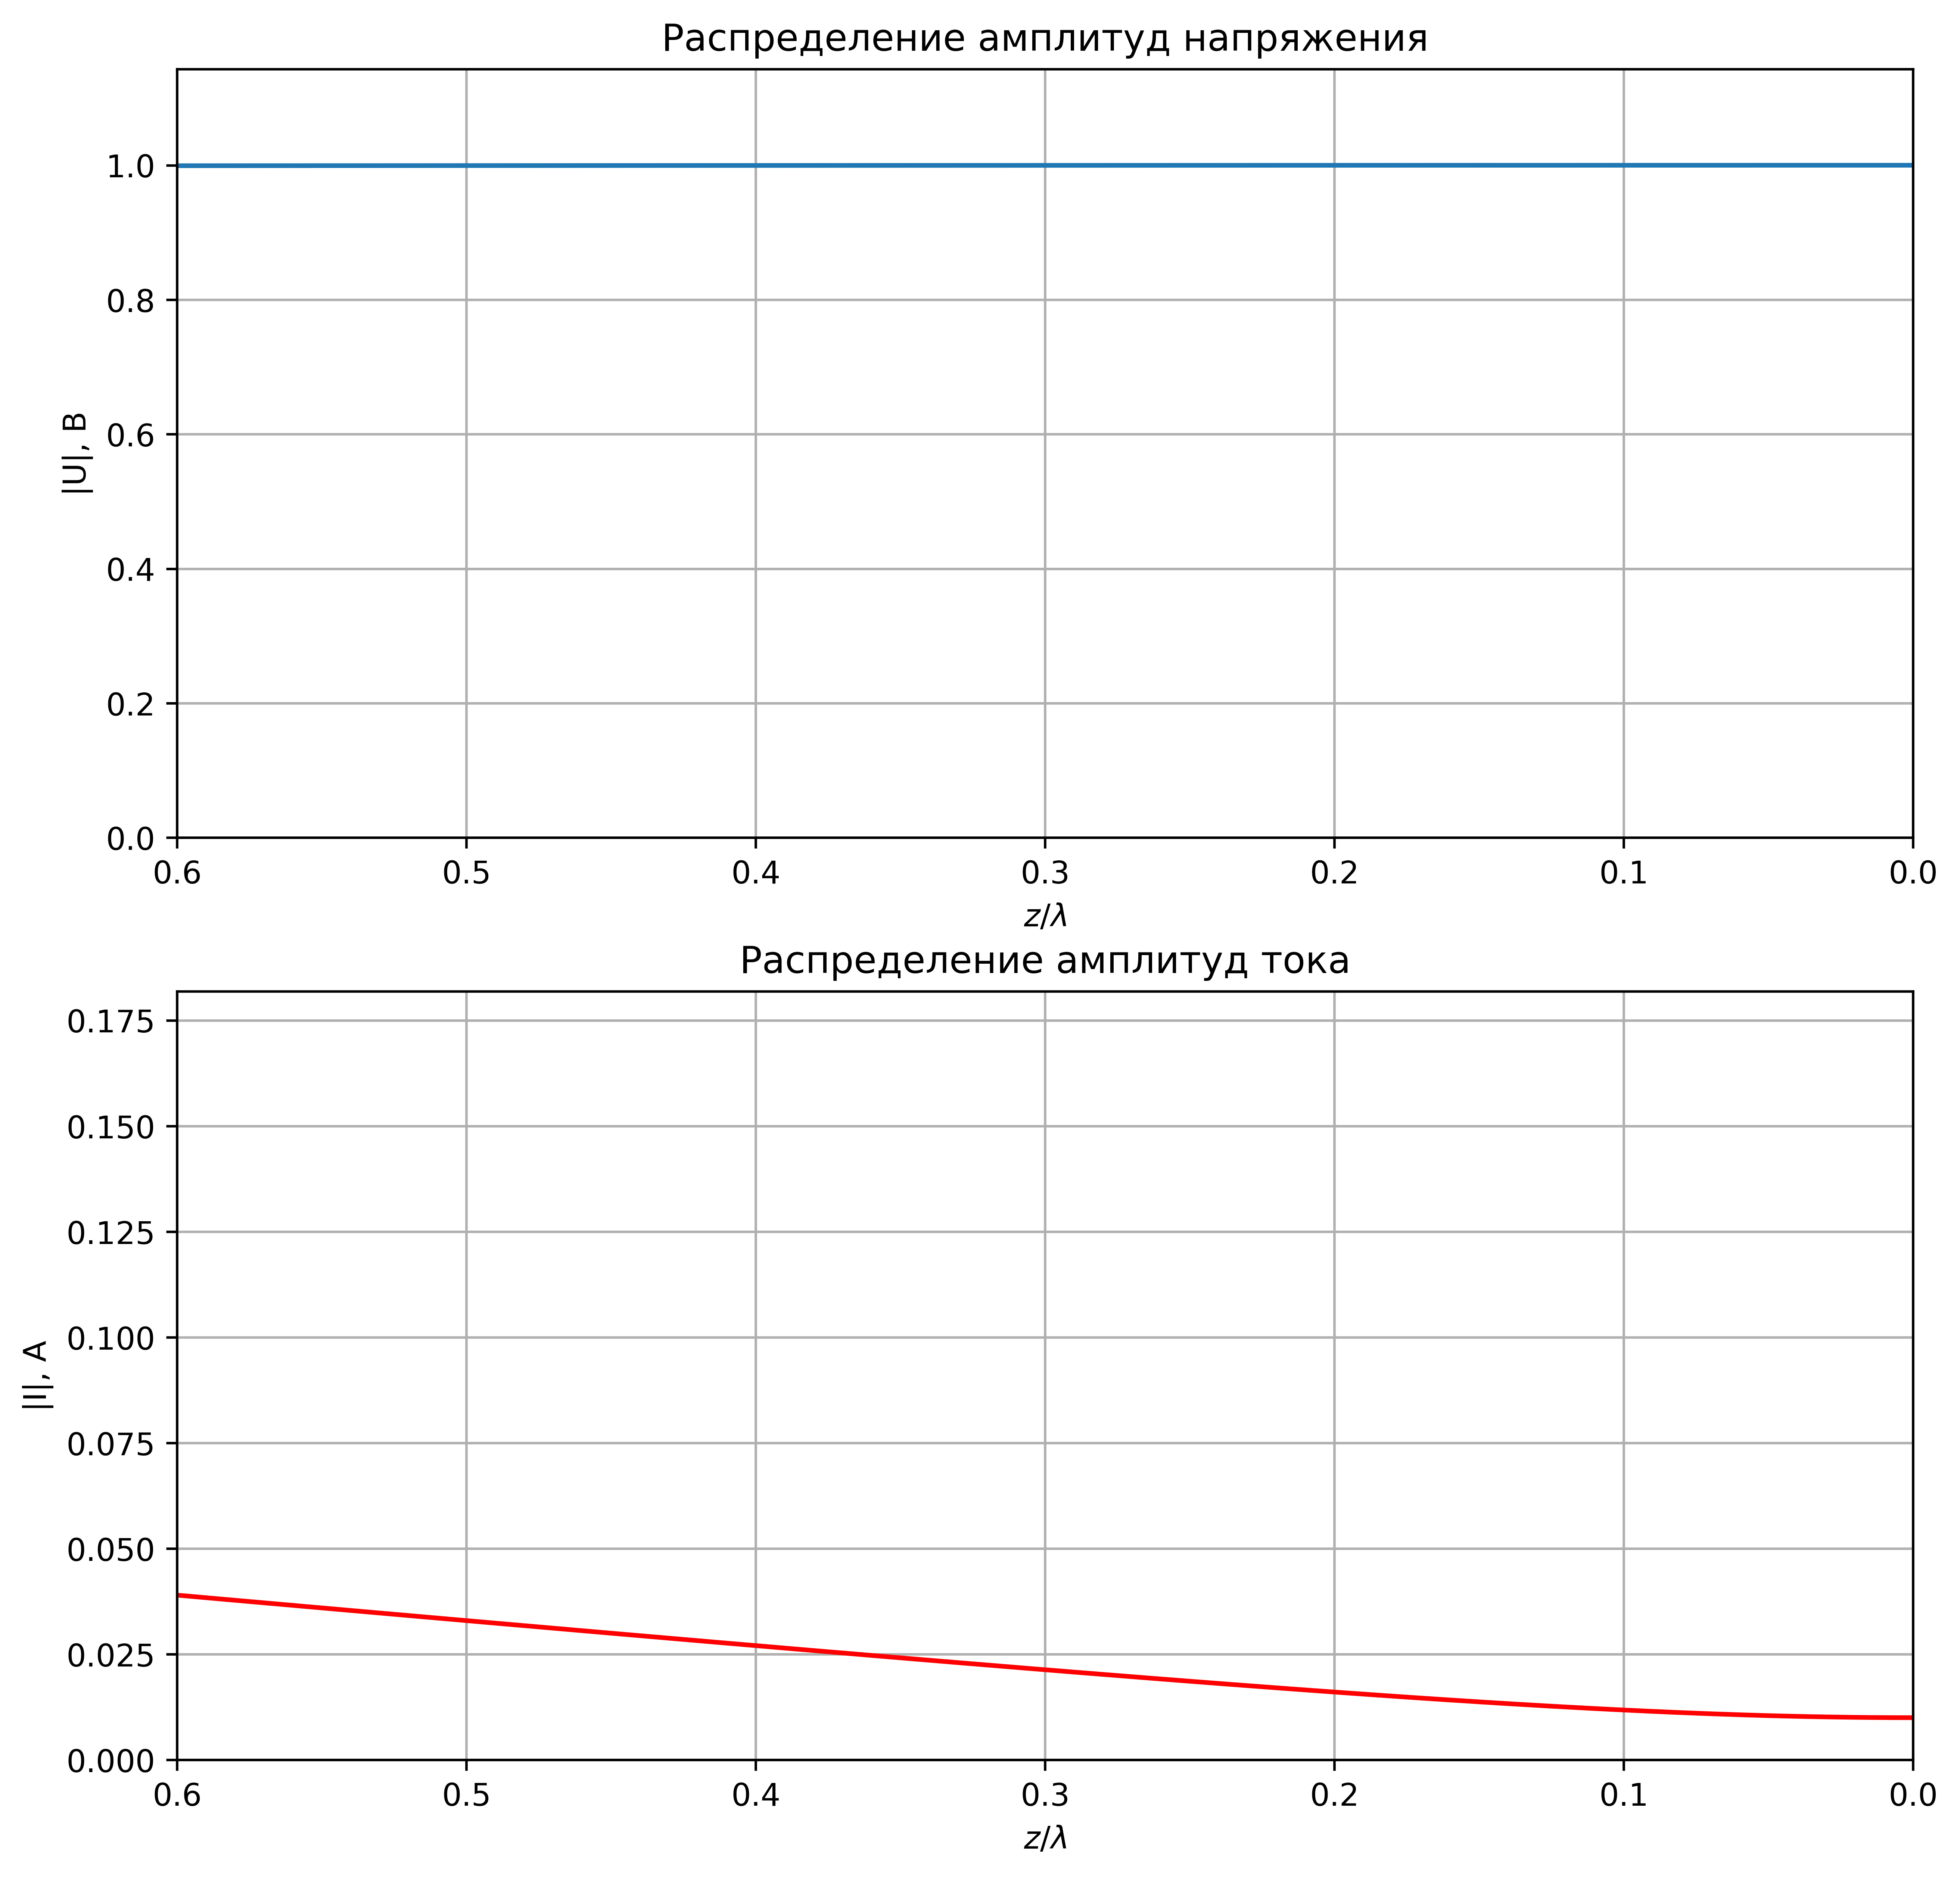

In [60]:
# С потерями
def U_loss(z,Zn):
    return Un*np.cosh(gamma1*z)+In*W*np.sinh(gamma1*z)
def I_loss(z,Zn):
    return In*np.cosh(gamma1*z)+Un/W*np.sinh(gamma1*z)

z=np.linspace(0,2,1000)*lmd

U_loss1=U_loss(z,Zn)
I_loss1=I_loss(z,Zn)

fig1, ax = plt.subplots(2,1,figsize=(10, 10), dpi=600)

ax[0].plot(z,np.abs(U_loss1))
ax[0].grid()
ax[0].set_xlim([2*lmd,0])
ax[0].set_ylim([0, max(abs(U_loss1))+1/7*max(abs(U1))])
ax[1].set_ylim([0, max(abs(I_loss1))+1/7*max(abs(I1))])
ax[0].set_xlabel('$z/\lambda$')
ax[0].set_ylabel('|U|, В')
ax[0].set_title("Распределение амплитуд напряжения")
ax[1].set_title("Распределение амплитуд тока")
ax[1].plot(z,np.abs(I_loss1),'r')
ax[1].grid()
ax[1].set_xlim([2*lmd,0])
ax[1].set_xlabel("$z/\lambda$")
ax[1].set_ylabel('|I|, А')